In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
[x for x in os.listdir() if x.startswith('count')]

['count-assembly-ALL-V.txt',
 'count-alignments-ALL-V.txt',
 'count-cdr3-IGH.txt',
 'count-cdr3-TRB.txt']

In [3]:
# Read nr of aligned sequences
nrs = list()
filenames = list()
barcodes = list()
fh = open("count-alignments-ALL-V.txt")
for line in fh:
    line = line.lstrip()
    line = line.rstrip()
    nr, filename = line.split(" ")
    if filename == "total":
        continue
    barcode, rest = filename.split("_S1_")
    nrs.append(int(nr))
    filenames.append(filename)
    barcodes.append(barcode)
fh.close()
df_align = pd.DataFrame({'barcode': barcodes, 'nr_alignments': nrs})
df_align.head()

,barcode,nr_alignments
0,AAACAGGC,34
1,AAAGCGGA,132
2,AAAGGCTG,25
3,AACACGCA,5
4,AACATGGG,32


In [4]:
# Read nr of assembled sequences
nrs = list()
filenames = list()
barcodes = list()
fh = open("count-assembly-ALL-V.txt")
for line in fh:
    line = line.rstrip()
    filename, rest, nr = line.split(":")
    barcode, rest = filename.split("_S1")
    nr = nr.lstrip()
    nr = nr.replace(",", "")
    nr = nr.split(" ")
    nrs.append(int(nr[0]))
    filenames.append(filename)
    barcodes.append(barcode)
fh.close()
df_assembly = pd.DataFrame({'barcode': barcodes, 'nr_assembly': nrs})
df_assembly.head()

,barcode,nr_assembly
0,AAACAGGC,30
1,AAAGCGGA,91
2,AAAGGCTG,16
3,AACACGCA,4
4,AACATGGG,28


In [5]:
# Read nr of IGH CDR3s
nrs = list()
filenames = list()
barcodes = list()
fh = open("count-cdr3-IGH.txt")
for line in fh:
    line = line.rstrip()
    filename, nr = line.split(":")
    barcode, rest = filename.split("_S1")
    nr = nr.split("\t")
    nrs.append(int(nr[1]))
    filenames.append(filename)
    barcodes.append(barcode)
fh.close()
df_cdr3_igh = pd.DataFrame({'barcode': barcodes, 'nr_cdr3_igh': nrs})
df_cdr3_igh.head()

,barcode,nr_cdr3_igh
0,AAACAGGC,2
1,AACCGGAA,1
2,AAGCGAGT,461
3,AAGGAGCA,1
4,AATCATGC,2


In [6]:
# Read nr of TRB CDR3s
nrs = list()
filenames = list()
barcodes = list()
fh = open("count-cdr3-TRB.txt")
for line in fh:
    line = line.rstrip()
    filename, nr = line.split(":")
    barcode, rest = filename.split("_S1")
    nr = nr.split("\t")
    nrs.append(int(nr[1]))
    filenames.append(filename)
    barcodes.append(barcode)
fh.close()
df_cdr3_trb = pd.DataFrame({'barcode': barcodes, 'nr_cdr3_trb': nrs})
df_cdr3_trb.head()

,barcode,nr_cdr3_trb
0,AAAGCGGA,1
1,AAAGGCTG,2
2,AATGGTGG,1
3,AGCGAACT,11
4,AGGAGACT,3


## Combine numbers in one table

In [9]:
df = pd.merge(df_align, df_assembly, how='left', on='barcode')
df = pd.merge(df, df_cdr3_igh, how='left', on='barcode')
df = pd.merge(df, df_cdr3_trb, how='left', on='barcode')
df = df.fillna(0)
df

,barcode,nr_alignments,nr_assembly,nr_cdr3_igh,nr_cdr3_trb
0,AAACAGGC,34,30.0,2.0,0.0
1,AAAGCGGA,132,91.0,0.0,1.0
2,AAAGGCTG,25,16.0,0.0,2.0
3,AACACGCA,5,4.0,0.0,0.0
4,AACATGGG,32,28.0,0.0,0.0
5,AACCCAAC,1,1.0,0.0,0.0
6,AACCGCTT,105,71.0,0.0,0.0
7,AACCGGAA,57,40.0,1.0,0.0
8,AACCTGCT,116,87.0,0.0,0.0
9,AACGAGGT,113,61.0,0.0,0.0


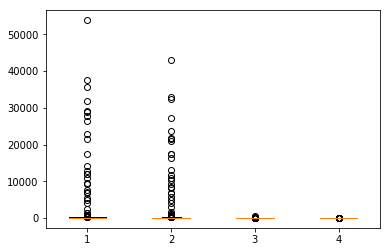

In [10]:
plt.boxplot([df['nr_alignments'], df['nr_assembly'], df['nr_cdr3_igh'], df['nr_cdr3_trb']])
plt.show()

In [11]:
df.to_excel("overview-vasaseq.xlsx")
print("Wrote overview-vasaseq.xlsx to disk")

Wrote overview-vasaseq.xlsx to disk
